# Stack Overflow Developer Survey Report
Udacity Datascience Nanodegree Program

## Introduction

The objective of this project is to answer the following questions based on the latest Stack Overflow Developer Survey 2019 Results *(The dataset used is taken from https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019).* 
* Why do developers visit Stack Overflow?
* How often do developers visit Stack Overflow?
* How accurate are coding solutions in general? Does it save time compared to other resources available?

In [2]:
#import neccessary libraries for analysis
import numpy as np
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

print("Import Libraries")

Import Libraries


In [3]:
#Fetching data from CSV file stored locally
#Original data source: https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019
df = pd.read_csv('./survey_results_public.csv')
df.head(5) # view dataset structure

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,28.0,Man,No,Straight / Heterosexual,NaN,Yes,Appropriate in length,Neither easy nor difficult
3,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
4,5,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,Ukraine,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech meetups or events in your area;Courses on...,30.0,Man,No,Straight / Heterosexual,White or of European descent;Multiracial,No,Appropriate in length,Easy


In [4]:
#Let's have a look at what the participants say
visits = df.SOVisitTo.value_counts().reset_index() #Provide a pandas series of the counts for each SOVisitTo status
visits.head()

,index,SOVisitTo
0,Find answers to specific questions,33842
1,Find answers to specific questions;Learn how t...,15416
2,Find answers to specific questions;Contribute ...,6955
3,Find answers to specific questions;Learn how t...,4265
4,Find answers to specific questions;Learn how t...,3467


In [6]:
# set more appropriate column names
visits.rename(columns={'index': 'purpose', 'SOVisitTo': 'count'}, inplace=True)
pd.set_option('display.max_colwidth', -1) 
visits.head() # view different options users surveyed selected as purpose of their visits to Stack Overflow

,purpose,count
0,Find answers to specific questions,33842
1,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,15416
2,Find answers to specific questions;Contribute to a library of information,6955
3,Find answers to specific questions;Learn how to do things I didn’t necessarily look for;Contribute to a library of information,4265
4,Find answers to specific questions;Learn how to do things I didn’t necessarily look for;Pass the time / relax,3467


In [7]:
# Create a list of the unique answers provided by survey respondents based on the above analysis
possible_vals = ["Get a sense of belonging to the developer community", "Pass the time / relax", 
                 "Find answers to specific questions", "Learn how to do things I didn’t necessarily look for",
                 "Contribute to a library of information", "Meet other people with similar skills or interests"]

In [8]:
# Get counts for each unique value in each survey response list
def total_count(df, col1, col2, look_for):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col1 - the column name you want to look through
    col2 - the column you want to count values from
    look_for - a list of strings you want to search for in each row of df[col]
    
    OUTPUT:
    new_df - a dataframe of each look_for with the count of how often it shows up 
    '''
    new_df = defaultdict(int)
    for val in look_for:
        for idx in range(df.shape[0]):
            if val in df[col1][idx]:
                new_df[val] += int(df[col2][idx])   
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col1, col2]
    new_df.sort_values('count', ascending=False, inplace=True)
    return new_df

### For What Purpose Do Developers Visit Stack Overflow?

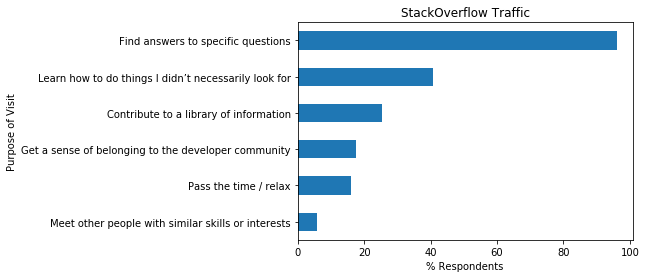

In [9]:
def plotdata(df, col, title='StackOverflow Traffic', plot=True):
    '''
    INPUT 
        df - a dataframe containing survey data
        col - column to analyze
        title - string the title of your plot
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        Display plot of column (col) if plot=True
    '''
    counts = df['SOVisitTo'].value_counts().reset_index()
    counts.rename(columns={'index': 'Purpose of Visit', col: 'count'}, inplace=True)
    counts_df = total_count(counts, 'Purpose of Visit', 'count', possible_vals)

    counts_df.set_index('Purpose of Visit', inplace=True)
    if plot:
        ((counts_df/df.shape[0])*100).sort_values('count', ascending=True).plot(kind='barh', legend=None,rot=0);
        plt.xlabel('% Respondents');
        plt.title(title);
        plt.show()

plotdata(df, 'SOVisitTo')

In [10]:
# Display survey respondents unique results by overall percentage
visit = df['SOVisitTo'].value_counts().reset_index()
visit.rename(columns={'index': 'Purpose of Visit', 'SOVisitTo': 'count'}, inplace=True)
visit_df = total_count(visit, 'Purpose of Visit', 'count', possible_vals)
visit_df['% Respondents'] = (visit_df['count']/df.shape[0])*100
visit_df['% Respondents'] = round(visit_df['% Respondents'],2)
pd.set_option('display.max_colwidth', -1)
visit_df[['Purpose of Visit','% Respondents']]

,Purpose of Visit,% Respondents
2,Find answers to specific questions,95.99
3,Learn how to do things I didn’t necessarily look for,40.71
4,Contribute to a library of information,25.42
0,Get a sense of belonging to the developer community,17.49
1,Pass the time / relax,16.06
5,Meet other people with similar skills or interests,5.67


### Analyze StackOverflow Weekly Visit Frequency

In [145]:
#Get the counts for each SOFindAnswer status
so_freq = df[pd.notnull(df['SOFindAnswer'])]['SOFindAnswer'].value_counts().reset_index() # only include records where respondent entered this field
so_freq.rename(columns={'index': 'Post/Ask A Question', 'SOFindAnswer': 'count'}, inplace=True)
so_freq['% Respondents'] = (so_freq['count']/np.sum(so_freq['count']))*100
so_freq['% Respondents'] = round(so_freq['% Respondents'],2)
so_freq[['Post/Ask A Question','% Respondents']]

,Post/Ask A Question,% Respondents
0,1-2 times per week,27.59
1,3-5 times per week,26.11
2,More than 10 times per week,17.21
3,6-10 times per week,14.65
4,Less than once per week,14.44


### Coding Solution on StackOverflow vs. Other Tool Efficiency

In [146]:
#Determine how efficient it is to get coding solutions on Stackoverflow compared to other resources
so_effectiveness = df[pd.notnull(df['SOTimeSaved'])]['SOTimeSaved'].value_counts().reset_index() # only include records where respondent entered this field
so_effectiveness.rename(columns={'index': 'Solve Coding Problem', 'SOTimeSaved': 'count'}, inplace=True)
so_effectiveness['% Respondents'] = (so_effectiveness['count']/np.sum(so_effectiveness['count']))*100
so_effectiveness['% Respondents'] = round(so_effectiveness['% Respondents'], 2)
so_effectiveness[['Solve Coding Problem','% Respondents']]

,Solve Coding Problem,% Respondents
0,Stack Overflow was much faster,52.50
1,Stack Overflow was slightly faster,24.72
2,They were about the same,19.72
3,The other resource was slightly faster,1.93
4,The other resource was much faster,1.13


### Time Saved by Getting Coding Solution on StackOverflow

In [147]:
# list of the responses indicating Stackoverflow saved the developer time compared with other resources
so_list = ["Stack Overflow was much faster", "Stack Overflow was slightly faster"]

#Get the counts for SOHowMuchTime for each SOTimeSaved in the above list
so_save = df[(df['SOTimeSaved'].isin(so_list))].SOHowMuchTime.value_counts().reset_index() 
so_save = df.SOHowMuchTime.value_counts().reset_index()
so_save.rename(columns={'index': 'Time Saved', 'SOHowMuchTime': 'count'}, inplace=True)
so_save['% Respondents'] = (so_save['count']/np.sum(so_save['count']))*100
so_save['% Respondents'] = round(so_save['% Respondents'], 2)
so_save[['Time Saved','% Respondents']]

,Time Saved,% Respondents
0,11-30 minutes,40.76
1,0-10 minutes,22.66
2,31-60 minutes,19.94
3,60+ minutes,16.63


### Conclusion
From the above analysis, we can derive the following results:
* Nearly all developers visit to Stack Overflow to find answers to specific problems they have, which is as expected. A select few users indicated they came to the Stack Overflow community for a range of different goals as well.
* A vast majority of developers frequented the site at least a few times per week to get help for various problems they are facing.
* Almost all participants indicated that Stack overflow was better at solving their coding problems compared with other resources available. Additionally, more that half of the developers surveyed indicated that the platform was much faster at helping them to solve coding problems.
* Furthermore, by analyzing the time saved by using Stack Overflow vs. other resources to solve coding problems, **around 37%** indicated **at least 30 minutes faster response** from the Stack Overflow community.